In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import drive
import os
drive.mount('/content/drive')
# Establecer ruta de acceso en drive
import os
print(os.getcwd())
os.chdir("/content/drive/My Drive")
print(os.getcwd())

Mounted at /content/drive
/content
/content/drive/My Drive


# Lectura de archivos

In [2]:
train=pd.read_csv('train.csv',sep=',')
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [3]:
print(train.shape)

(1460, 81)


# Exploracion dataset



In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Borrado de duplicados

In [6]:
print(train.shape)
train= train.drop_duplicates()
print(train.shape)

(1460, 81)
(1460, 81)


# Analisis de nulos (OJO)

In [7]:
# Columnas con porcentaje de nulos
pd.set_option('display.max_rows', None)  # or 1000
serie=(train.isnull().sum()/train.shape[0])*100
serie=serie.sort_values(ascending=False)
serie= serie[serie>0]
serie

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

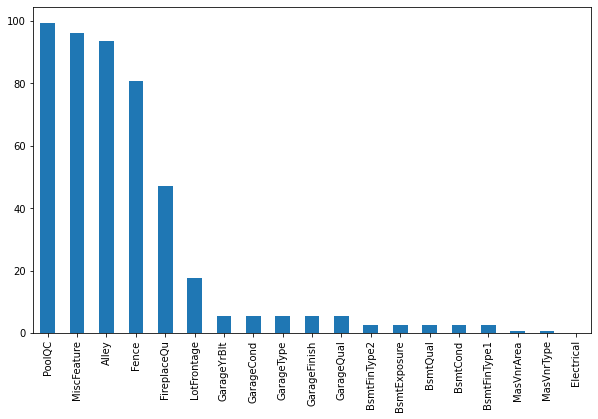

In [8]:
# Graficamente
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
serie.plot(kind='bar')

In [9]:
pip install missingno

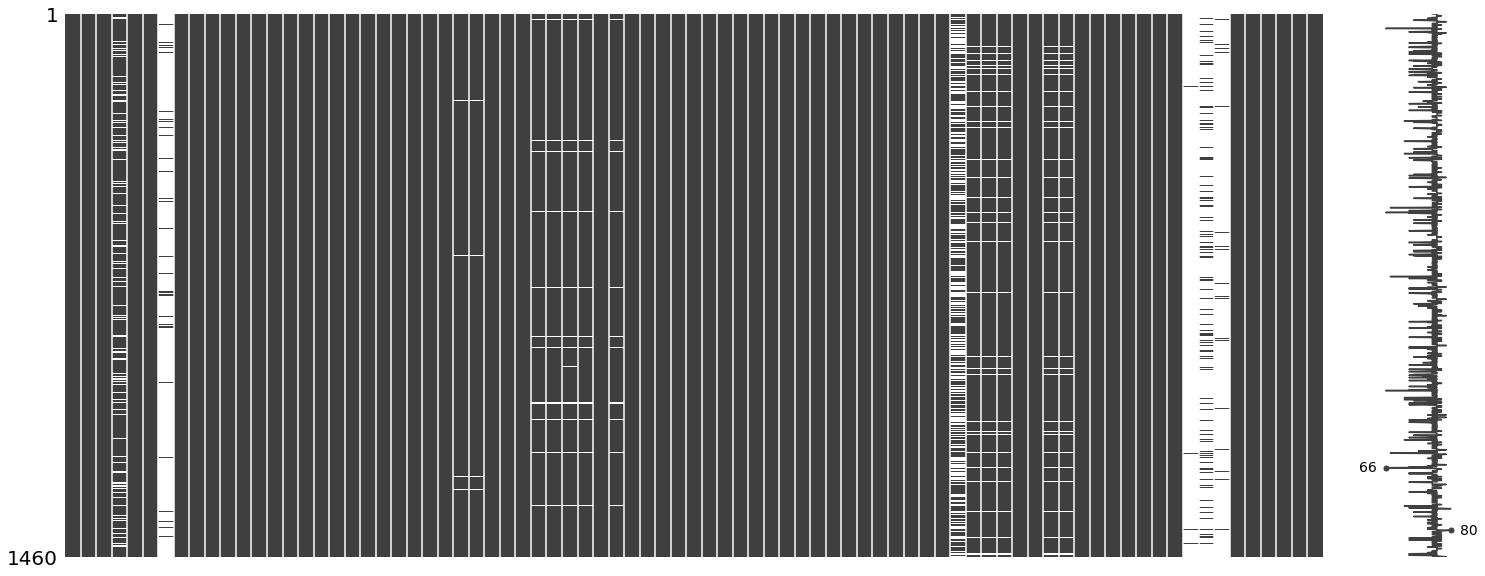

In [10]:
import missingno as msno
msno.matrix(train)

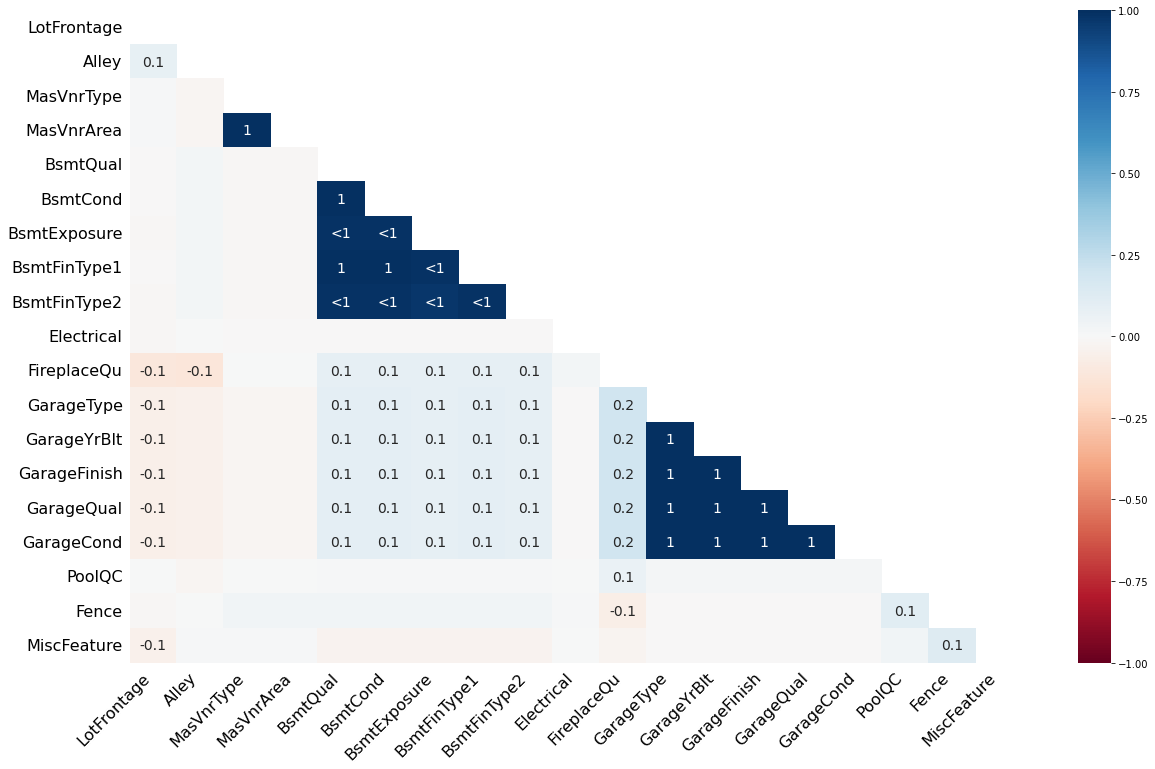

In [11]:
msno.heatmap(train)

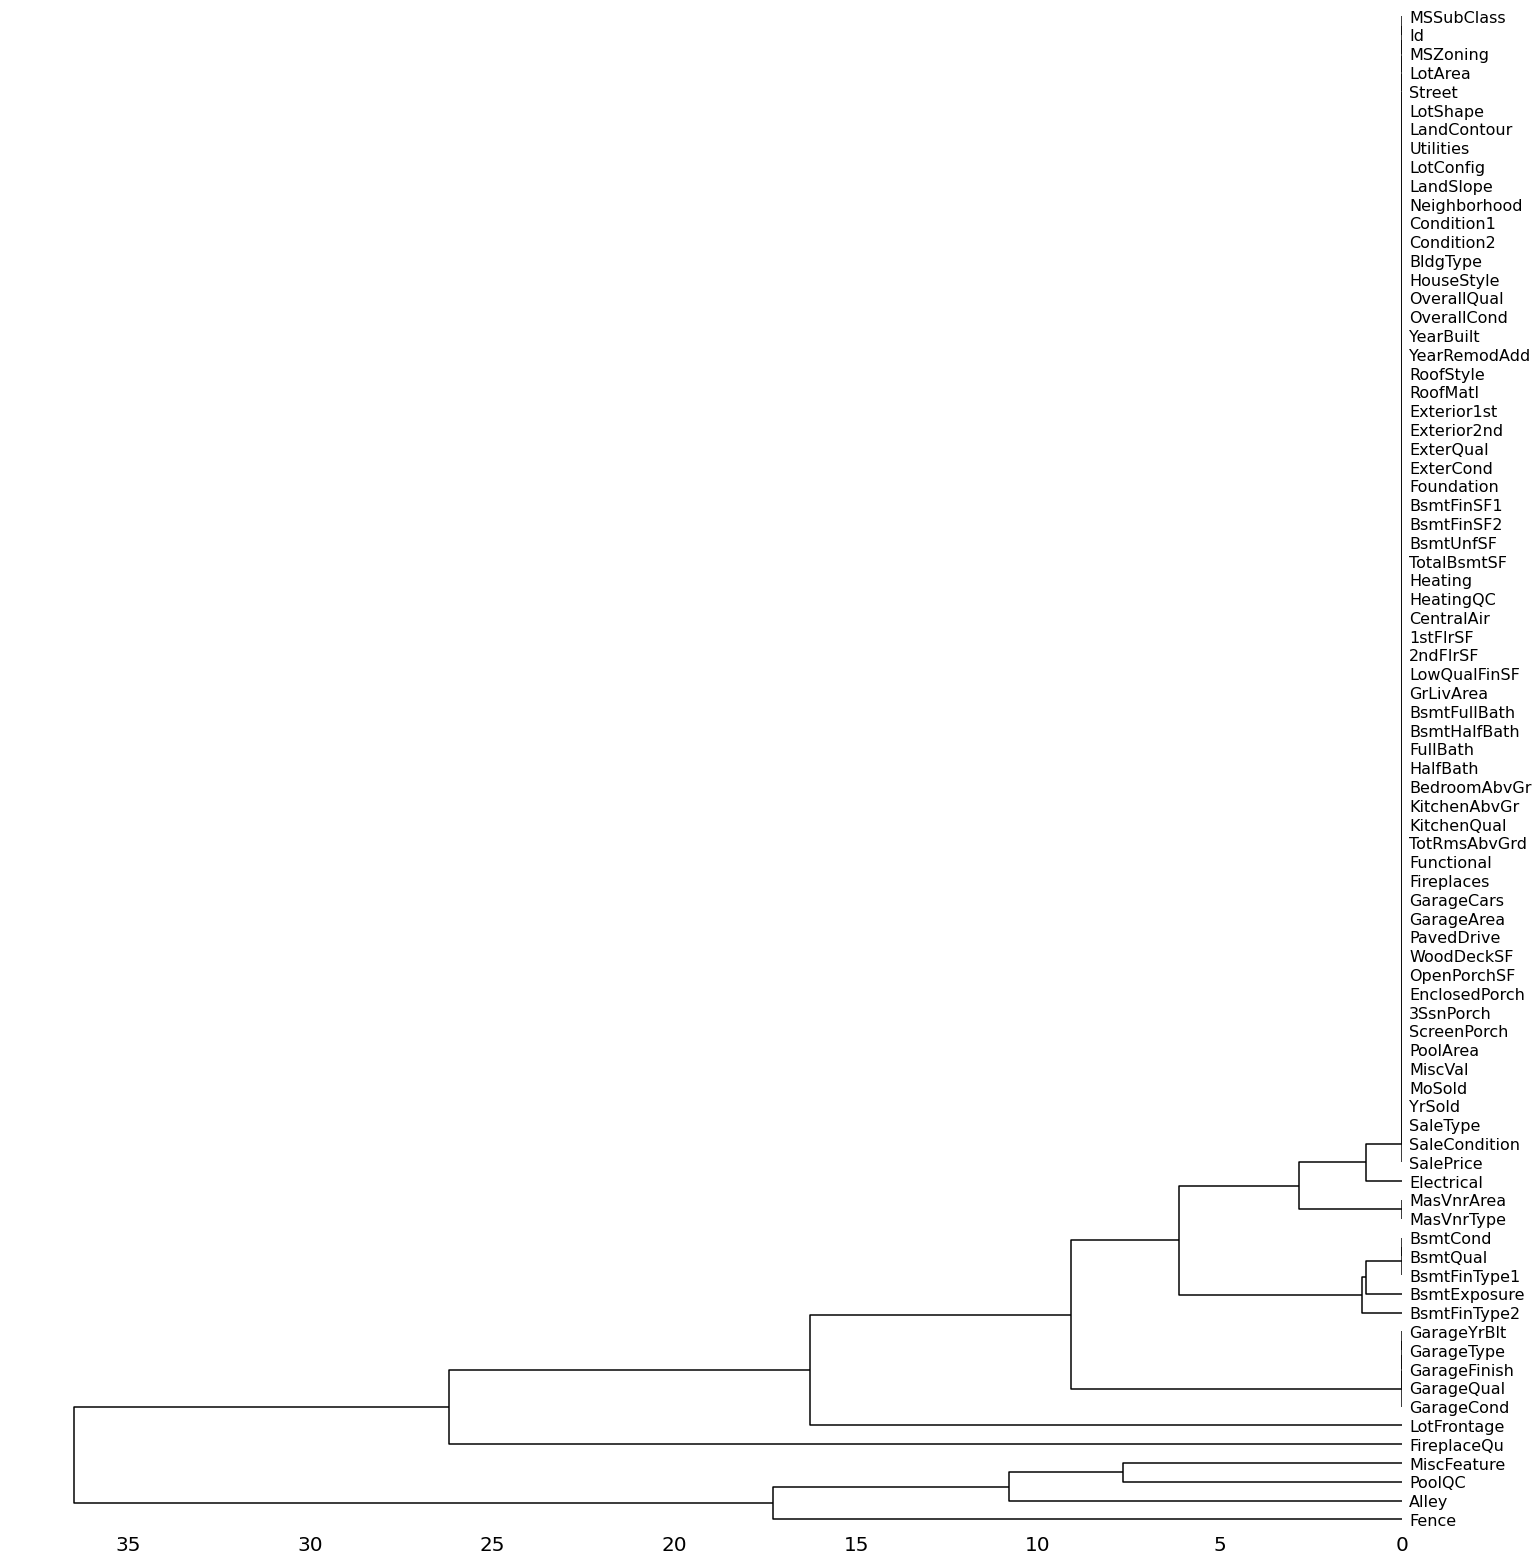

In [12]:
msno.dendrogram(train)

Comenzar a mirar las variables con mayor cantidad de nulos y explorar si tienen algo que aportar

In [13]:
train.PoolQC.value_counts() # Decision: borrar

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [14]:
train.MiscFeature.value_counts() # Decision: borrar

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [15]:
train.Alley.value_counts() # Decision: borrar

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [16]:
train.Fence.value_counts() # Decision: borrar

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [17]:
train.FireplaceQu.value_counts() # Decision: Con este se podria hacer otra tecnica en vez de borrar la columna

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [18]:
train.LotFrontage.isnull().sum() # Decision: Reemplazar con alguna tecnica de interpolacion

259

In [19]:
train.GarageFinish.value_counts() # Decision: Alguna tecnica de reemplazo

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [20]:
train.GarageQual.value_counts() # Decision: Alguna tecnica de reemplazo

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [21]:
train.GarageCond.value_counts() # Decision: Reemplazar con alguna tecnica 

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [22]:
train.GarageType.value_counts() # Decision: Reemplazar con alguna tecnica

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [23]:
train.BsmtExposure.value_counts() # Decision: Tecnica reemplazro

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [24]:
train.GarageYrBlt.isnull().sum() # Decision: Reemplazar con alguna tecnica de interpolacion

81

In [25]:
train.BsmtFinType2.value_counts() # Decision: Tecnica reemplazro

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [26]:
train.BsmtFinType1.value_counts() # Decision: Tecnica reemplazro

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [27]:
train.BsmtCond.value_counts()# Decision: reemplzar moda

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [28]:
train.BsmtQual.value_counts()# Decision: reemplzar moda

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [29]:
train.MasVnrArea.isnull().sum()

8

In [30]:
train.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [31]:
train.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [32]:
train.shape

(1460, 81)

# Borrado de columnas

In [33]:
col_del=['PoolQC','MiscFeature','Alley','Fence','Id'] # Columnas a borrar que no aportan
col_inter= ['LotFrontage','GarageYrBlt','MasVnrArea'] # Columnas a interpolar
col_cat= ['FireplaceQu','GarageFinish','GarageCond','GarageType','BsmtExposure','BsmtFinType2','BsmtFinType1','BsmtCond',
          'BsmtQual','MasVnrType','Electrical'] # Columnas cateogoricas

In [34]:
# Borrar variables
train_x=train.drop(labels=col_del, axis=1) # Borrando las columnas en col_del
train_x.columns # Verificando las columnas que quedaron

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

# Llenar con la mediana 

In [35]:
for i in col_inter: # reemplazar por la mediana en las columnas numericas en col_inter
  train_x[i] = train_x[i].fillna(train_x[i].median())

In [36]:
train_x.MasVnrArea.isnull().sum() # Verificar que funciono

0

# Llenar con categoria desconocido

In [37]:
for i in col_cat: # Reemplazar los vacios por Desconocido
  train_x[i] = train_x[i].fillna('Desconocido') 

In [38]:
train_x.Electrical.isnull().sum() # Verificando que funciona

0

In [39]:
train_x.SaleCondition.dtype

dtype('O')

In [40]:
train_x.SaleCondition.value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

# Recodificar variables categoricas

In [41]:
alldata=[] # lista para guardar resultados de One hot Encoding
alldata1=[] # lista para guardar resultados de 
variables=[] # ir guardando las variables
for i in train_x.columns: # iterar sobre todas las columnas
  if train_x[i].dtype == 'O': # Quedarme con las que sean tipo object
    if len(train_x[i].unique()) ==2: # Si solo tienen dos categorias aplicar One Hot Encoding
      print('Variable 2 categorias:',i)
      y= pd.get_dummies(train_x[i]) # Aplicar One Hot Encoding
      alldata.append(y) # ir agregando las columnas resultantes en alldata
      variables.append(i)
    else:
      pass
    print('--------------------')
    if len(train_x[i].unique()) >2: # Si las categorias tienen mas de 2 categorias aplicar LabelEncoder
      print('Variable >2 categorias:',i)
      z= pd.DataFrame()
      z[i]=train_x[i].astype('category').cat.codes # Aplicar Label Encoder
      alldata1.append(z) # Agregar a la lista alldata1
      variables.append(i) #
  if train_x[i].dtype == 'float64': # Si la columna es numerica entonces normalizar z score
    train_x[i]=(train_x[i]-train_x[i].mean())/(train_x[i].std()) # yapo
data_y=pd.concat(alldata, axis=1) # concatenar las columnas obtenidas One hot Encoding
data_z=pd.concat(alldata1, axis=1) # concatenar las columnas de Label Encoder
train_y= pd.concat([data_y,data_z,train_x],axis=1) # Unir todos los datasets One Hot Encoding, LabelEncoder, Z score
train_y=train_y.drop(labels=variables, axis=1) # Borrar las columnas ya recodificadas
train_y.head() # mostrar que quedo 

--------------------
Variable >2 categorias: MSZoning
Variable 2 categorias: Street
--------------------
--------------------
Variable >2 categorias: LotShape
--------------------
Variable >2 categorias: LandContour
Variable 2 categorias: Utilities
--------------------
--------------------
Variable >2 categorias: LotConfig
--------------------
Variable >2 categorias: LandSlope
--------------------
Variable >2 categorias: Neighborhood
--------------------
Variable >2 categorias: Condition1
--------------------
Variable >2 categorias: Condition2
--------------------
Variable >2 categorias: BldgType
--------------------
Variable >2 categorias: HouseStyle
--------------------
Variable >2 categorias: RoofStyle
--------------------
Variable >2 categorias: RoofMatl
--------------------
Variable >2 categorias: Exterior1st
--------------------
Variable >2 categorias: Exterior2nd
--------------------
Variable >2 categorias: MasVnrType
--------------------
Variable >2 categorias: ExterQual
------

Grvl  Pave  AllPub  NoSeWa  N  Y  MSSubClass  LotFrontage  LotArea  \
0     0     1       1       0  0  1          60    -0.220799     8450   
1     0     1       1       0  0  1          20     0.460162     9600   
2     0     1       1       0  0  1          60    -0.084607    11250   
3     0     1       1       0  0  1          70    -0.447787     9550   
4     0     1       1       0  0  1          60     0.641752    14260   

   OverallQual  ...  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0            7  ...           0           61              0          0   
1            6  ...         298            0              0          0   
2            7  ...           0           42              0          0   
3            7  ...           0           35            272          0   
4            8  ...         192           84              0          0   

   ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SalePrice  
0            0         0        0       2    2008     208500  
1            0         0        0       5    2007     181500  
2            0         0        0       9    2008     223500  
3            0         0        0       2    2006     140000  
4            0         0        0      12    2008     250000  

[5 rows x 43 columns]

# Verificando que no hay datos nulos

In [42]:
train_y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Grvl           1460 non-null   uint8  
 1   Pave           1460 non-null   uint8  
 2   AllPub         1460 non-null   uint8  
 3   NoSeWa         1460 non-null   uint8  
 4   N              1460 non-null   uint8  
 5   Y              1460 non-null   uint8  
 6   MSSubClass     1460 non-null   int64  
 7   LotFrontage    1460 non-null   float64
 8   LotArea        1460 non-null   int64  
 9   OverallQual    1460 non-null   int64  
 10  OverallCond    1460 non-null   int64  
 11  YearBuilt      1460 non-null   int64  
 12  YearRemodAdd   1460 non-null   int64  
 13  MasVnrArea     1460 non-null   float64
 14  BsmtFinSF1     1460 non-null   int64  
 15  BsmtFinSF2     1460 non-null   int64  
 16  BsmtUnfSF      1460 non-null   int64  
 17  TotalBsmtSF    1460 non-null   int64  
 18  1stFlrSF

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4f9037d8-f2e9-4683-9ce3-67576f784ec7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>